In [1]:
import pandas as pd
import numpy as np
import os

  ##### 12 months of files merdged into a single csv file



In [2]:

#df=pd.read_csv("data/Sales_April_2019.csv")
files=[file for file in os.listdir('data')]
all_months_data = pd.DataFrame() #creates an empty data frame to store all my data
for file in files:
    #print(file)
    df=pd.read_csv('data/'+file)  #reads all the file in the data frame
    all_months_data=pd.concat([all_months_data,df])
all_months_data.to_csv('all_data.csv',index=False)
all_data=pd.read_csv('data/all_data.csv')

###### clean up the data and add month column

In [3]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df
all_data.dropna(axis='index',how='all',inplace=True)
all_data=all_data[all_data['Order Date'].str[0:2]!='Or'] #remove 'Or' from Order Date series data
all_data['Month']=all_data['Order Date'].str[0:2].astype(int) 

#### clean up data and add sales column

In [21]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Best month for sales and price earned that month

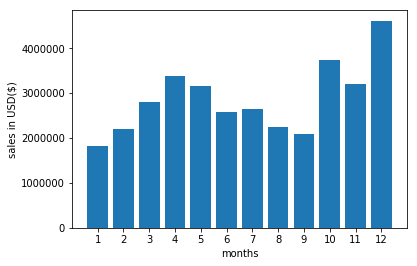

In [27]:
result=all_data.groupby(['Month']).sum()
import matplotlib.pyplot as plt
months=range(1,13)
plt.xticks(months)
plt.bar(months,result['Sales'])
plt.ylabel('sales in USD($)')
plt.xlabel('months')
plt.show()